## WordCloud

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
listing= pd.read_csv("listings_text_cleaned_full.csv")

In [4]:
listing.shape

(45008, 6)

In [5]:
listing.columns

Index(['Unnamed: 0', 'name', 'description', 'neighborhood_overview',
       'host_about', 'price'],
      dtype='object')

In [6]:
listing.describe()

Unnamed: 0         price
count  45008.000000  45008.000000
mean   22503.500000    231.454183
std    12992.834795    257.617591
min        0.000000     10.000000
25%    11251.750000     90.000000
50%    22503.500000    150.000000
75%    33755.250000    264.000000
max    45007.000000   2085.000000

In [7]:
# get percentile
percentile = np.percentile(listing['price'], [25,50,75,100]) # gets 25th, 50th, 75th, 100th percentile
percentile

array([  90.,  150.,  264., 2085.])

In [8]:
# create percentile groups
# change labels to low price, low-medium price, high-medium price, high price
listing['percentile']=pd.cut(listing['price'], [-np.inf]+ list(percentile)+ [np.inf], labels= [1,2,3,4,5])

In [9]:
listing.head()

Unnamed: 0                                         name  \
0           0            panoramic ocean view venice beach   
1           1  spanish bungalow guest house la plus nights   
2           2             boho chic flat steps beach beach   
3           3            guest house entrance exit hot tub   
4           4   amazing bright elegant condo park upgraded   

                                         description  \
0  craftsmen style penthouse ocean view rooms par...   
1  private guest house space private guest house ...   
2  bright airy quiet bedroom located steps seclud...   
3  fully self contained separate structure entran...   
4  beach unit upgraded new bamboo flooring brand ...   

                               neighborhood_overview  \
0            close beach live venice boardwalk beach   
1  local la community shops restaurants walking d...   
2  beach locations los angeles peninsula marina d...   
3           close venice hassle parking spaces beach   
4                                                NaN   

                                          host_about  price percentile  
0  yoga practice studying years spend months thai...  152.0          3  
1  male educated healthcare professional cycle ru...   75.0          1  
2  health wellness professional author passionate...  125.0          2  
3  easy going hostess enjoy stay experienced trav...  189.0          3  
4  paolo privitera ceo evensi paolo mit mba phone...  115.0          2

In [10]:
listing['percentile'].unique()

[3, 1, 2, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [11]:
bin_count= listing['percentile'].value_counts()
bin_count

1    11511
2    11301
4    11213
3    10983
5        0
Name: percentile, dtype: int64

In [12]:
# separate each bins into its own dataframe
bin1_25= listing[listing['percentile'] == 1] 
bin2_50= listing[listing['percentile'] == 2]
bin3_75= listing[listing['percentile'] == 3]
bin4_100= listing[listing['percentile'] == 4]   

In [13]:

bin1_25['price'].median()

65.0

In [14]:
bin2_50['price'].median()

120.0

In [15]:
bin3_75['price'].median()

198.0

In [16]:
bin4_100['price'].median()

410.0

## Create Word Cloud

Median Price of each bins  
Bin1- $65  (low price)  
Bin2- $120 (low-medium price)  
Bin3- $198 (high-medium price)  
Bin4- $410 (high price)    

In [84]:
from wordcloud import WordCloud, STOPWORDS

def makeWordcloud(a):
  wordcloud = WordCloud(
                            collocations = False,
                            width=1600, height=800,
                            background_color='white',
                            stopwords=["Airbnb", "room","bed","bedroom","apartment","beach","nan"],
                            max_words=150,
                            #max_font_size=40, 
                            random_state=42
                          ).generate(' '.join(a)) # can't pass a series, needs to be strings and function computes frequencies
  #print(wordcloud)

  import matplotlib.pyplot as plt
  plt.figure(figsize=(9,8))
  fig = plt.figure(1)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

## WordCloud for Name

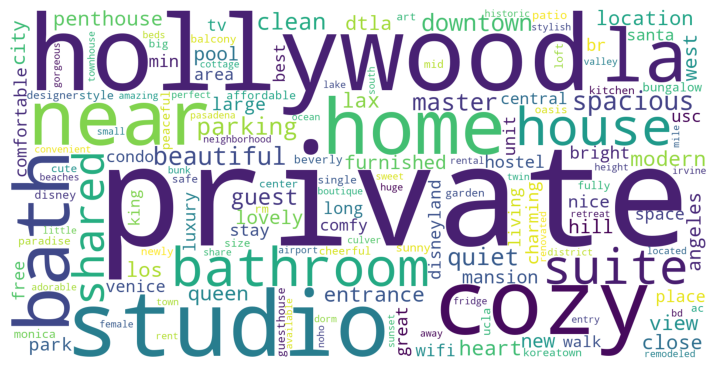

In [85]:
# Bin1, wordcloud doesn't look as compacted as the other ones. Check word count. Relate the word count to price
# private room, mostly private room
makeWordcloud(bin1_25['name'].astype(str).tolist())

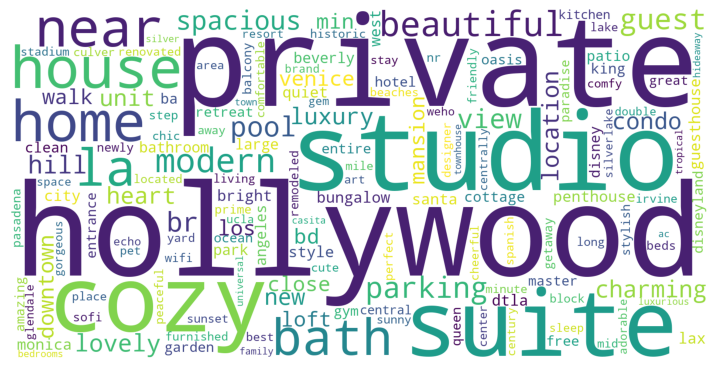

In [81]:
makeWordcloud(bin2_50['name'].astype(str).tolist())

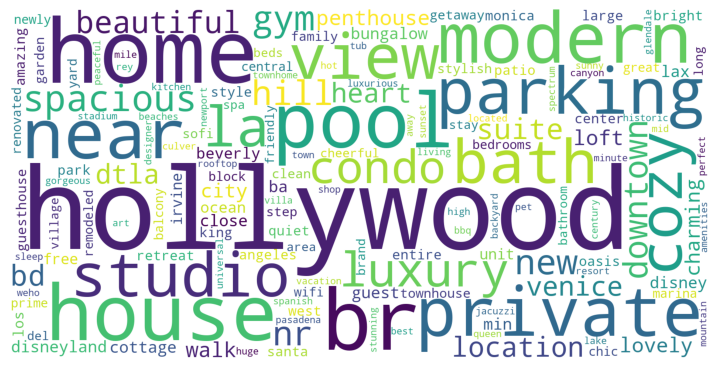

In [86]:
makeWordcloud(bin3_75['name'].astype(str).tolist())

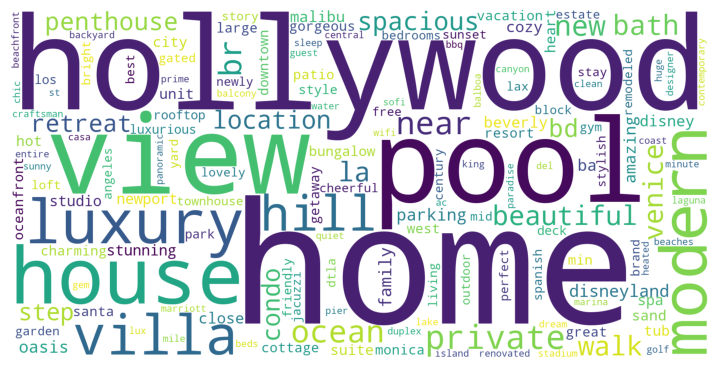

In [87]:
makeWordcloud(bin4_100['name'].astype(str).tolist())

## WordCloud for Description

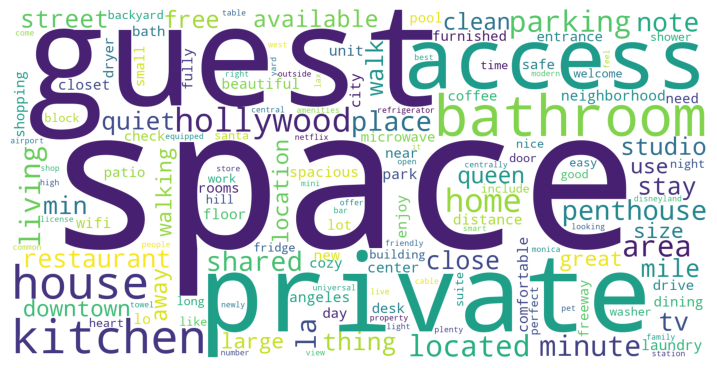

In [88]:
makeWordcloud(bin1_25['description'].astype(str).tolist())

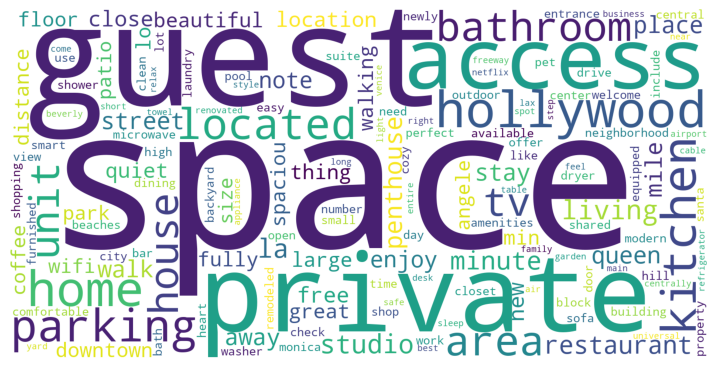

In [89]:
makeWordcloud(bin2_50['description'].astype(str).tolist())

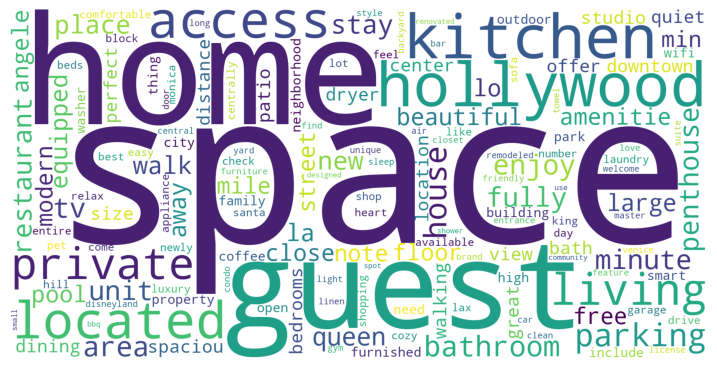

In [90]:
makeWordcloud(bin3_75['description'].astype(str).tolist())

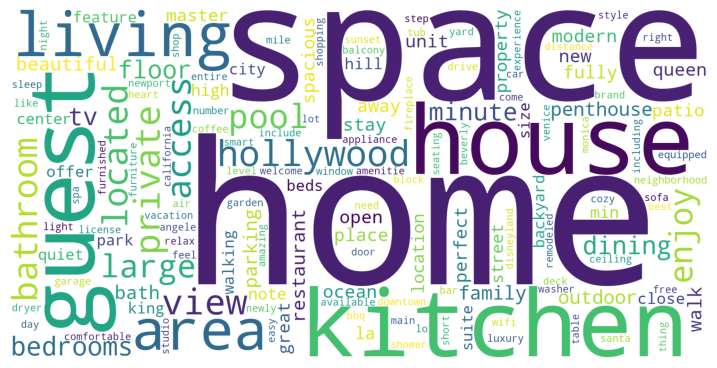

In [91]:
makeWordcloud(bin4_100['description'].astype(str).tolist())

## WordCloud for Neighborhood Overview

Check out 'mile', word keeps getting bigger as percentile increases. What does mile indicate? mile from the beach? or a certain point of interest

'downtown' is in each wordcloud

'beach' is prominent

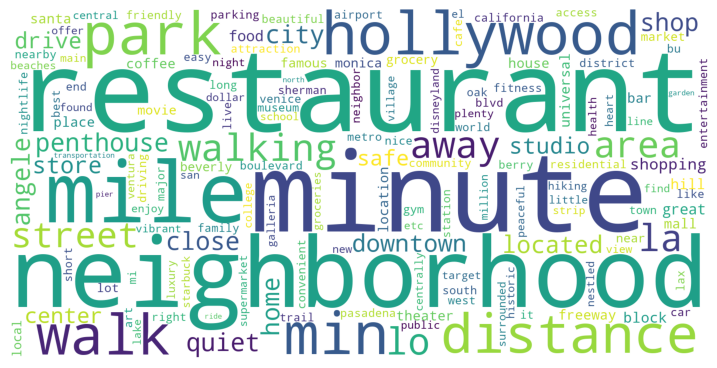

In [92]:
makeWordcloud(bin1_25['neighborhood_overview'].astype(str).tolist())

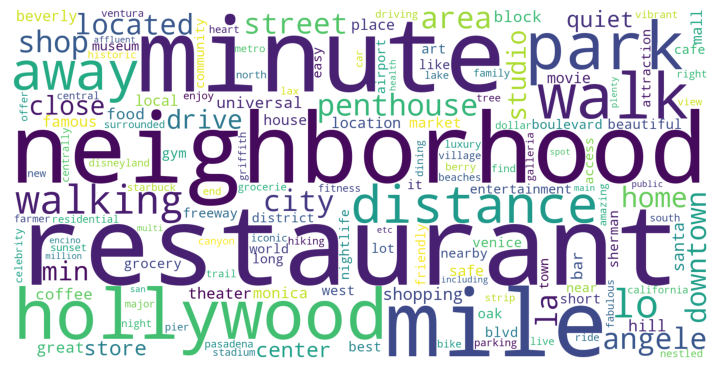

In [93]:
makeWordcloud(bin2_50['neighborhood_overview'].astype(str).tolist())

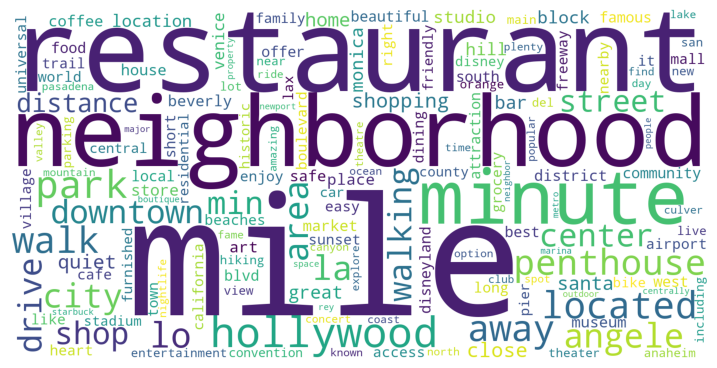

In [94]:
makeWordcloud(bin3_75['neighborhood_overview'].astype(str).tolist())

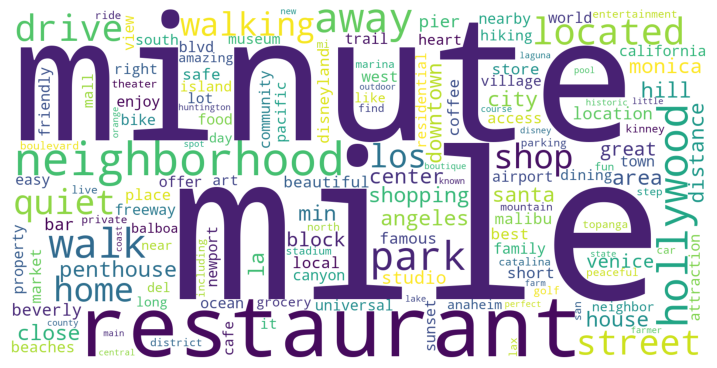

In [95]:
makeWordcloud(bin4_100['neighborhood_overview'].astype(str).tolist())

## WordCloud for Host About

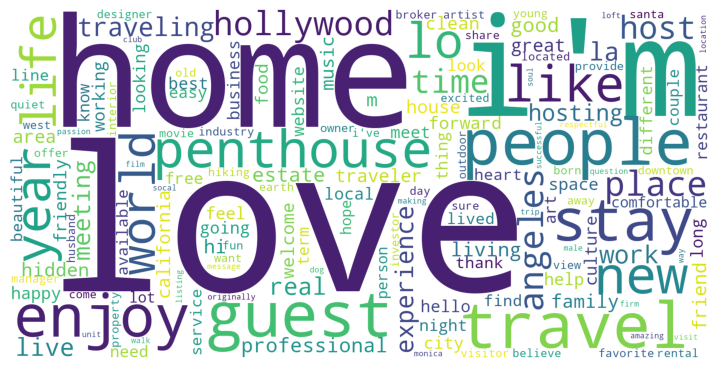

In [96]:
makeWordcloud(bin1_25['host_about'].astype(str).tolist())

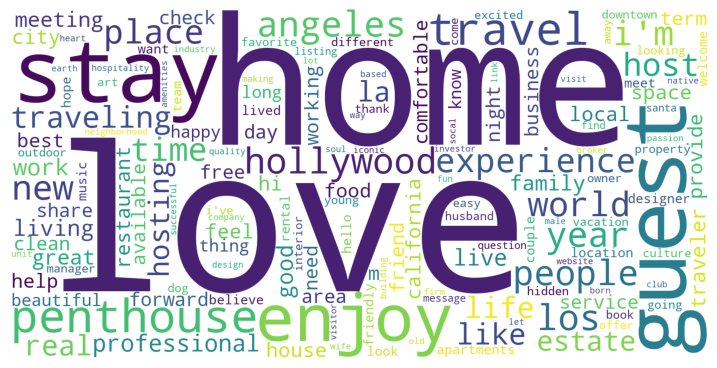

In [97]:
makeWordcloud(bin2_50['host_about'].astype(str).tolist())

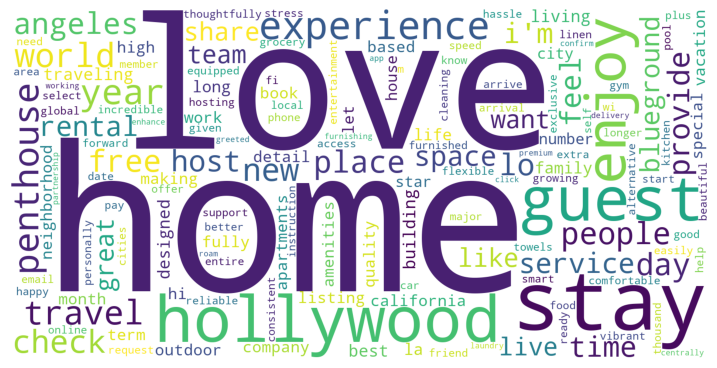

In [98]:
makeWordcloud(bin3_75['host_about'].astype(str).tolist())

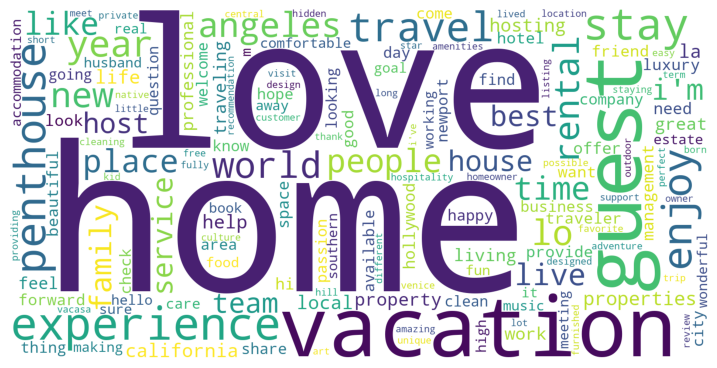

In [99]:
makeWordcloud(bin4_100['host_about'].astype(str).tolist())

## Price Category: Low-End and High-End

In [36]:
bins=[0,150,1000, np.inf]
labels =['low-end', 'middle', 'high-end']
listing['price_category']= pd.cut(listing['price'], bins=bins, labels=labels)

In [38]:
listing['price_category']

0         middle
1        low-end
2        low-end
3         middle
4        low-end
          ...   
45003    low-end
45004    low-end
45005    low-end
45006     middle
45007    low-end
Name: price_category, Length: 45008, dtype: category
Categories (3, object): ['low-end' < 'middle' < 'high-end']

In [41]:
low_end= listing[listing['price_category'] =='low-end']
middle= listing[listing['price_category'] =='middle']
high_end= listing[listing['price_category'] =='high-end']

## Create Word Cloud - Name

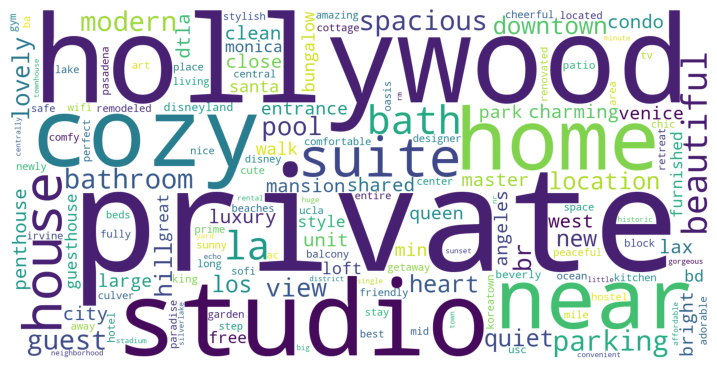

In [100]:
makeWordcloud(low_end['name'].astype(str).tolist())

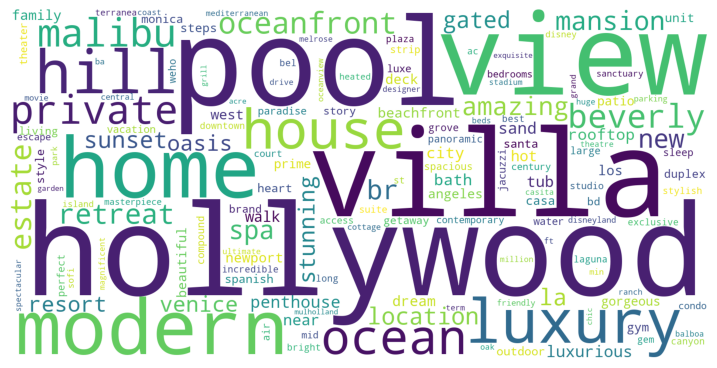

In [102]:
makeWordcloud(high_end['name'].astype(str).tolist())

In [ ]:
b

## Description

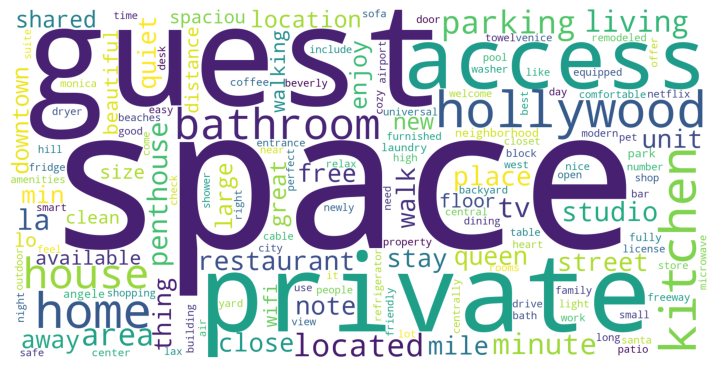

In [103]:
makeWordcloud(low_end['description'].astype(str).tolist())

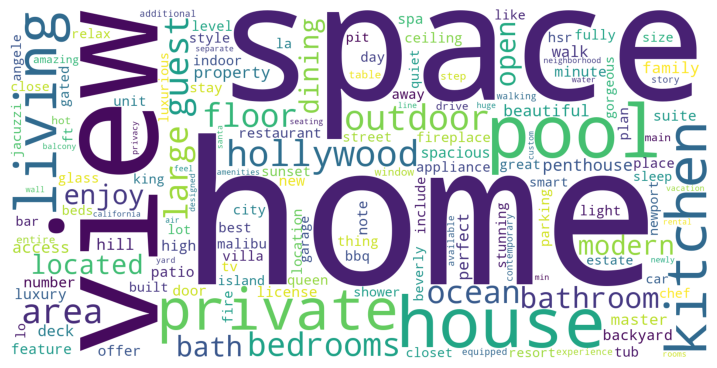

In [104]:
makeWordcloud(high_end['description'].astype(str).tolist())

neighborhood

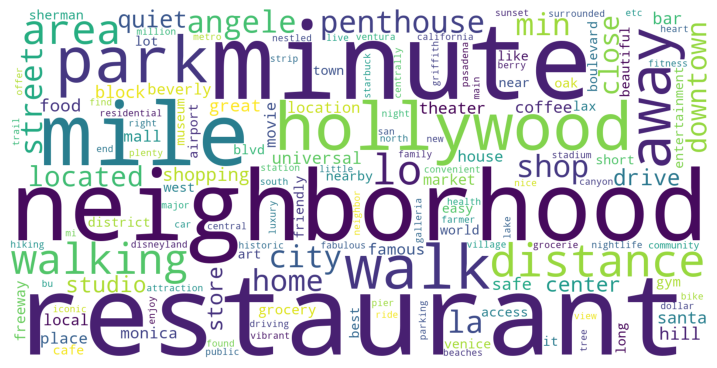

In [105]:
makeWordcloud(low_end['neighborhood_overview'].astype(str).tolist())

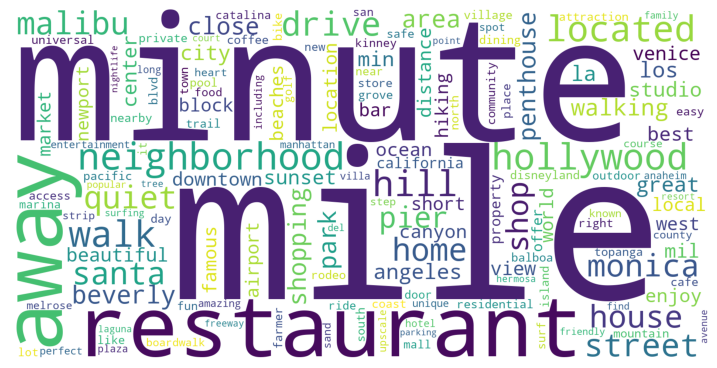

In [106]:
makeWordcloud(high_end['neighborhood_overview'].astype(str).tolist())

host_about

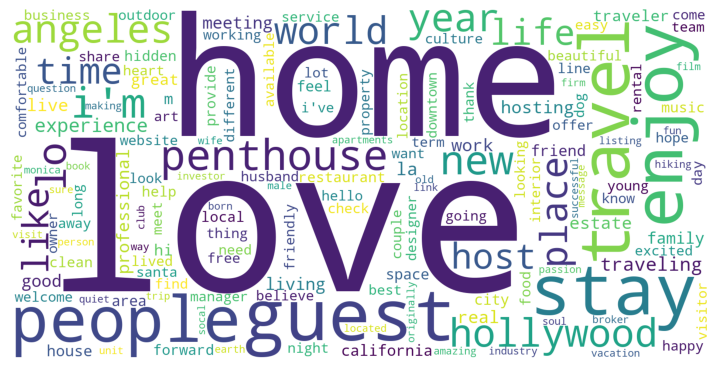

In [107]:
makeWordcloud(low_end['host_about'].astype(str).tolist())

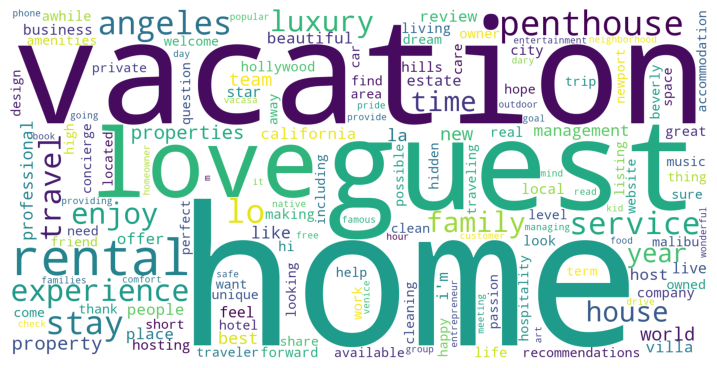

In [108]:
makeWordcloud(high_end['host_about'].astype(str).tolist())

In [110]:
high_end.head(20)

Unnamed: 0                                               name  \
94            94                 venice walk street modern br house   
187          187          dog friendly bd home private beach malibu   
214          214               mulholland mid century pool fab view   
241          241  beverly hills luxury bed bath villa hollywood ...   
264          264                   beach santa monica mediterranean   
343          343                   breathtaking beach home roofdeck   
570          570                        malibu beachfront penthouse   
583          583                hollywood villa best location beach   
644          644   short stays ok bh weho sunset hills contemporary   
737          737      lax beachhouse luxury sand sanitized near lax   
915          915           shabby chic malibu water sun deck lounge   
931          931                    beach retreat park like setting   
963          963           stunning bedroom santa monica beach home   
966          966                         beach br beach home ' sand   
1022        1022               hollywood hills gated compound beach   
1069        1069        rancho miramar malibu acre ocean view ranch   
1094        1094                  gated hollywood hills view estate   
1157        1157           sunny ranch garden home film photo stays   
1319        1319                        late plan trip summer beach   
1469        1469  clean paradise venice canals message dm short ...   

                                            description  \
94    contemporary cottage open floor plan floor bed...   
187   probably better way escape forget temporarily ...   
214   apartment wonderfully glamorous hip cosy open ...   
241   villa typical rental home apartment real home ...   
264   classic home desirable santa monica los angele...   
343   home located apartment corner walk street righ...   
570   luxury beach malibu penthouse ideal vacation d...   
583   location location location best possible locat...   
644   short stays ok bh weho sunset hills contempora...   
737   sanitized secluded private high speed wifi per...   
915   slide open oversized folding glass doors let f...   
931   gated secure quiet beautiful home situated apa...   
963   wake sun streaming floor ceiling windows archi...   
966   perfect location environment memorable experie...   
1022  gated hollywood hills compound property rented...   
1069  panoramic ocean views close location miles san...   
1094  spectacular gated compound privately sequester...   
1157  sunny ranch home garde film location rental ma...   
1319  beach home strand hermosa beach mediterranean ...   
1469  awaken apartment poster bed apartment grand tr...   

                                  neighborhood_overview  \
94    house walking distance abbot kinney lincoln ve...   
187   malibu hottest areas visit california kiss pac...   
214   spacious special super cool house apartment ce...   
241                                                 NaN   
264                                                 NaN   
343   beautiful beachfront house hollywood gorgeous ...   
570   malibu property unprecedented privacy sits str...   
583   quiet residentual close areas interest hiking ...   
644      quiet secure best location neighbourhood beach   
737   beach lax beachhouse uniquely located exclusiv...   
915   beach house apartment short drive surfrider be...   
931                                                 NaN   
963   meters beach apartment short walk santa monica...   
966   area house boardwalk known strand hermosa beac...   
1022  star studded hollywood hills neighbors hip are...   
1069  neighborhood great walking biking driving litt...   
1094                                                NaN   
1157                   film friendly neighborhood quiet   
1319  beach steps sand relaxing gorgeous villa beach...   
1469  located famous canals venice gem walking dista...   

                                  

In [114]:
high_end['price'].median()

1400.0

In [115]:
low_end['price'].median()

90.0